In [1]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import glob
from pathlib import Path
import seaborn as sns
import matplotlib._color_data as mcd

folder = [x for x in Path('model_output/').glob('*') if not x.is_file()]

comp = 'diffI'

all_sim = {}

for fold in folder:
    data = []
    print(f'loading {str(fold)[13:]} ... ', end = '')
    
    for filename in Path(str(fold)).rglob('*.csv'):

        sim = pd.read_csv(filename)
        sim = sim[sim['comp']==comp]
        sim.drop('comp', axis =1, inplace=True)
        sim.set_index('time', inplace = True)
        sim = sim.sum(axis = 1)
        data.append(sim)
    data = pd.concat(data,axis=1)
    print(f'... {len(data.columns)} loaded')
    all_sim[str(fold)[13:]] = data

fig, axes = plt.subplots(1,1, figsize =(16,10))
i = 0
for key, value in all_sim.items():
    axes.plot(value.quantile(.5, axis = 1), label = key, c = list(mcd.XKCD_COLORS)[i*15],
             linewidth = 12-i*2)
    axes.fill_between(value.index, value.quantile(.05, axis = 1), 
                      value.quantile(.95, axis = 1), alpha =.1, 
                      facecolor=list(mcd.XKCD_COLORS)[i*15])
    i +=1
    
#axes.set_ylim(0,60)
axes.legend()
#axes.set_xlim(0,40)
fig.autofmt_xdate()

loading seir ... 

ValueError: No objects to concatenate

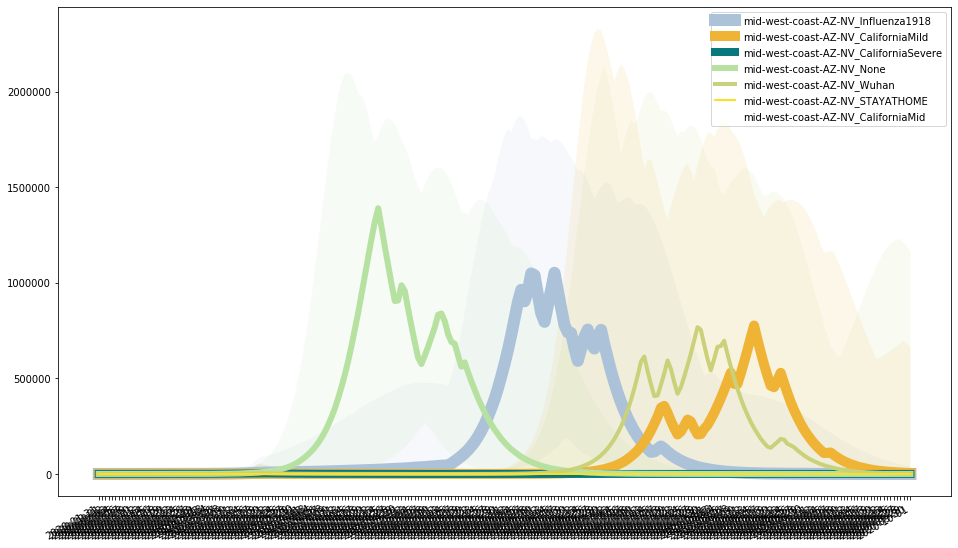

In [15]:
fig, axes = plt.subplots(1,1, figsize =(16,10))
i = 0
for key, value in all_sim.items():
    axes.plot(value.quantile(.5, axis = 1), label = key, c = list(mcd.XKCD_COLORS)[i*15],
             linewidth = 12-i*2)
    axes.fill_between(value.index, value.quantile(.05, axis = 1), 
                      value.quantile(.95, axis = 1), alpha =.1, 
                      facecolor=list(mcd.XKCD_COLORS)[i*15])
    i +=1
    
#axes.set_ylim(0,60)
axes.legend()
#axes.set_xlim(0,40)
fig.autofmt_xdate()


In [17]:
all_sim.keys()

dict_keys(['mid-west-coast-AZ-NV_Influenza1918', 'mid-west-coast-AZ-NV_CaliforniaMild', 'mid-west-coast-AZ-NV_CaliforniaSevere', 'mid-west-coast-AZ-NV_None', 'mid-west-coast-AZ-NV_Wuhan', 'mid-west-coast-AZ-NV_STAYATHOME', 'mid-west-coast-AZ-NV_CaliforniaMid'])

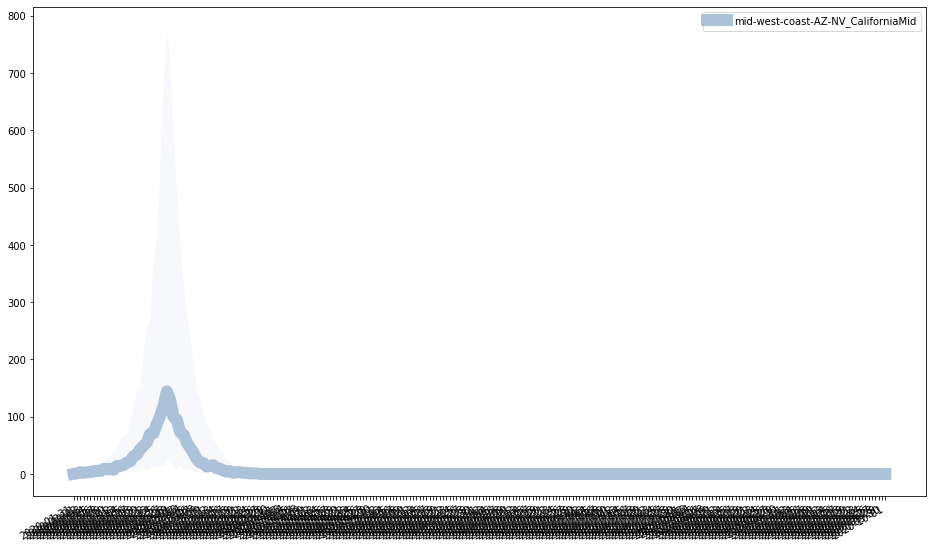

In [19]:
fig, axes = plt.subplots(1,1, figsize =(16,10))
i = 0
value = all_sim['mid-west-coast-AZ-NV_STAYATHOME']
axes.plot(value.quantile(.5, axis = 1), label = key, c = list(mcd.XKCD_COLORS)[i*15],
         linewidth = 12-i*2)
axes.fill_between(value.index, value.quantile(.05, axis = 1), 
                  value.quantile(.95, axis = 1), alpha =.1, 
                  facecolor=list(mcd.XKCD_COLORS)[i*15])
i +=1
    
#axes.set_ylim(0,60)
axes.legend()
#axes.set_xlim(0,40)
fig.autofmt_xdate()